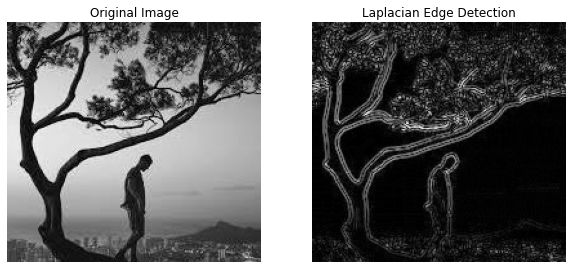

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\Bindushree\Pictures\download.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

# Apply the Laplacian operator
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Convert back to uint8
laplacian = cv2.convertScaleAbs(laplacian)

# Display the original and the edge-detected image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Laplacian Edge Detection')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.show()


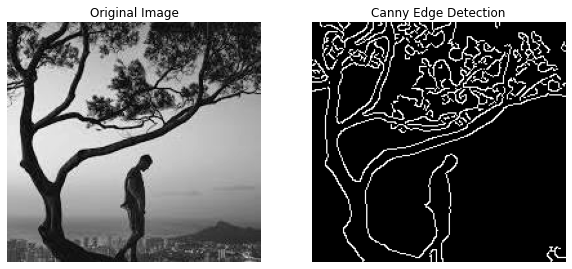

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\Bindushree\Pictures\download.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Apply Canny edge detection
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Display the original and the edge-detected image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()


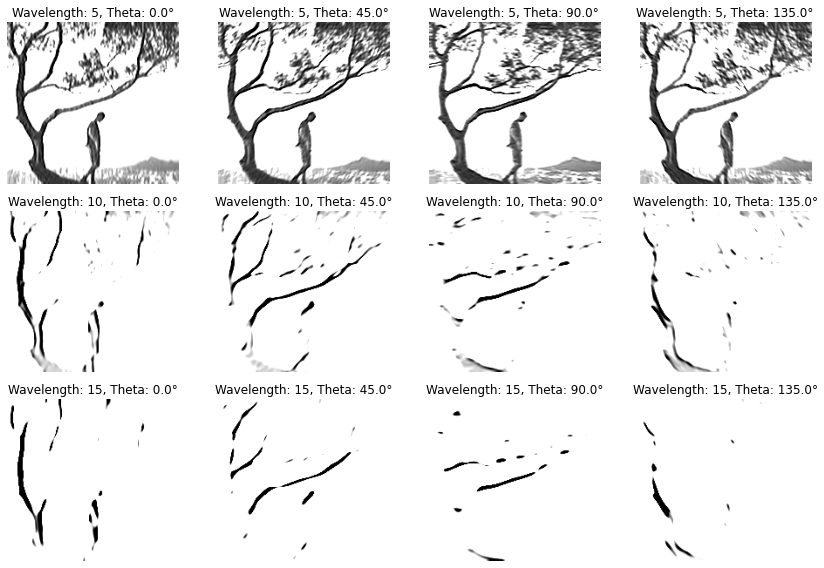

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gabor_filter(image, wavelength, theta, psi=0, gamma=1, sigma=None):
    """Apply a Gabor filter to an image."""
    if sigma is None:
        sigma = wavelength / 4.0
    
    # Create Gabor filter
    kernel_size = int(6 * sigma + 1)  # Ensure kernel size is odd
    kernel_size = kernel_size + 1 if kernel_size % 2 == 0 else kernel_size
    
    gabor = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, wavelength, gamma, psi, ktype=cv2.CV_32F)
    
    # Apply Gabor filter
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor)
    return filtered_image

# Load the image
image = cv2.imread(r"C:\Users\Bindushree\Pictures\download.jpeg", cv2.IMREAD_GRAYSCALE)

# Define parameters for Gabor filter
wavelengths = [5, 10, 15]  # Different wavelengths
thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Different orientations

# Prepare for displaying results
fig, axes = plt.subplots(len(wavelengths), len(thetas), figsize=(12, 8))

for i, wavelength in enumerate(wavelengths):
    for j, theta in enumerate(thetas):
        filtered_image = gabor_filter(image, wavelength, theta)
        axes[i, j].imshow(filtered_image, cmap='gray')
        axes[i, j].axis('off')
        axes[i, j].set_title(f'Wavelength: {wavelength}, Theta: {theta * 180/np.pi:.1f}°')

plt.tight_layout()
plt.show()

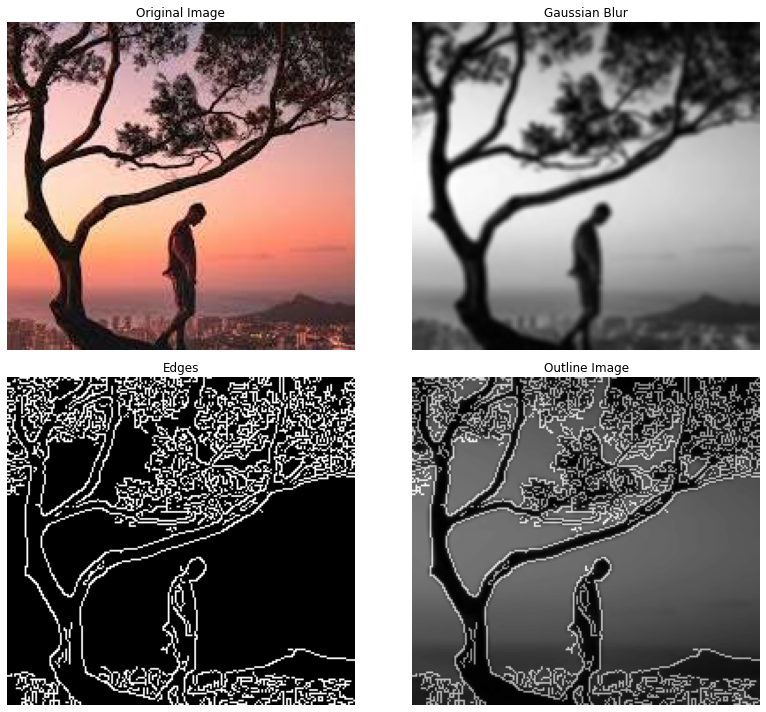

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\Bindushree\Pictures\download.jpeg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian filter
gaussian_blur = cv2.GaussianBlur(image_gray, (5, 5), 1.5)

# Detect edges using Canny
edges = cv2.Canny(image_gray, threshold1=50, threshold2=150)

# Create an outline image by combining the Gaussian blur and the edges
outline_image = cv2.addWeighted(gaussian_blur, 0.5, edges, 0.5, 0)

# Display the original, Gaussian blurred, edges, and outline images
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Gaussian Blur')
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Outline Image')
plt.imshow(outline_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

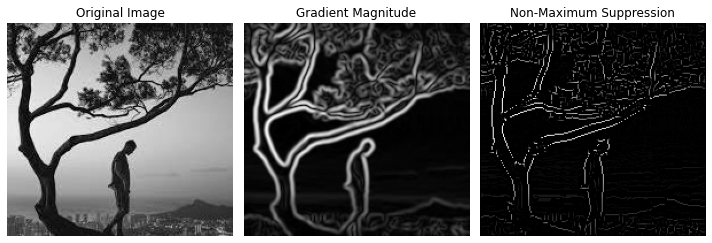

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_maximum_suppression(gradient_magnitude, gradient_direction):
    """Apply non-maximum suppression."""
    Z = np.zeros_like(gradient_magnitude, dtype=np.float32)
    height, width = gradient_magnitude.shape

    # Round the gradient direction to the nearest 45 degrees
    direction = gradient_direction * 180.0 / np.pi  # Convert to degrees
    direction[direction < 0] += 180

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Get the angle of the gradient direction
            angle = direction[i, j]
            q = 255
            r = 255
            
            # 0 or 180 degrees
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                q = gradient_magnitude[i, j + 1]
                r = gradient_magnitude[i, j - 1]
            # 45 degrees
            elif 22.5 <= angle < 67.5:
                q = gradient_magnitude[i + 1, j - 1]
                r = gradient_magnitude[i - 1, j + 1]
            # 90 degrees
            elif 67.5 <= angle < 112.5:
                q = gradient_magnitude[i + 1, j]
                r = gradient_magnitude[i - 1, j]
            # 135 degrees
            elif 112.5 <= angle < 157.5:
                q = gradient_magnitude[i - 1, j - 1]
                r = gradient_magnitude[i + 1, j + 1]

            # Non-maximum suppression
            if (gradient_magnitude[i, j] >= q) and (gradient_magnitude[i, j] >= r):
                Z[i, j] = gradient_magnitude[i, j]
    
    return Z

# Load the image
image = cv2.imread(r"C:\Users\Bindushree\Pictures\download.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.5)

# Calculate gradients using Sobel operator
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude and direction
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x)

# Apply non-maximum suppression
nms_image = non_maximum_suppression(gradient_magnitude, gradient_direction)

# Display results
plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Non-Maximum Suppression')
plt.imshow(nms_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
